In [14]:
# import
%matplotlib inline  
import matplotlib.pyplot as plt

import random
import math
import numpy as np

In [15]:
# create traders class
class RandomTrader:
    def __init__(self, stock, cash):
        self.X = stock.copy()
        self.cash = cash.copy()
    
    def random_trade(self):
        return np.random.randint(-2, 3)

    def trade(self, num_steps):
        for i in range(1, num_steps):
            self.X[i] = self.X[i - 1] + self.random_trade()
            
    def show_stock(self):
        return self.X
    
class TrendFollower:
    def __init__(self, stock, cash):
        self.X = stock.copy()
        self.cash = cash.copy()
        self.min_leverage = 1
        self.max_leverage = 8
        self.action = np.zeros(np.shape(X))
        self.actions = np.zeros(np.shape(X))
    
    def trend_following_trade(self, S, current_step):
        if current_step <= 3:
            return 0
        mean = sum(S[current_step - 4:current_step - 1])/3
        if S[current_step - 1] < mean:
            self.actions[current_step] = self.sell(S, current_step)
            return self.sell(S, current_step)
        elif S[current_step - 1] > mean:
            self.actions[current_step] = self.buy(S, current_step)
            return self.buy(S, current_step)
        else:
            return 0
        
    def buy(self, S, current_step):
        self.action[current_step] = 1
        totalValue = X[current_step - 1] * S[current_step - 1] + cash[current_step - 1]
        return np.floor((self.max_leverage / (self.max_leverage + 1)) * totalValue / S[current_step - 1]) - self.X[current_step - 1]
    
    def sell(self, S, current_step):
        self.action[current_step] = -1
        totalValue = X[current_step - 1] * S[current_step - 1] + cash[current_step - 1]
        return np.ceil((self.min_leverage / (self.min_leverage + 1)) * totalValue / S[current_step - 1]) - self.X[current_step - 1]

    def trade(self, S, current_step):
        self.X[current_step] = self.X[current_step - 1] + self.trend_following_trade(S, current_step)
        self.cash[current_step] = self.cash[current_step - 1] - self.trend_following_trade(S, current_step) * S[current_step - 1]
            
    def get_stock(self):
        return self.X
    
    def get_cash(self):
        return self.cash
    
    def get_value(self, S):
        return [x * s + c for x, s, c in zip(self.X, S, self.cash)]
    
class MeanReversion:
    def __init__(self, stock, cash):
        self.X = stock.copy()
        self.cash = cash.copy()
        self.min_leverage = 1
        self.max_leverage = 8
        self.action = np.zeros(np.shape(X))
        self.actions = np.zeros(np.shape(X))
        
    def mean_reversion_trade(self, S, current_step):
        if current_step <= 3:
            return 0
        mean = sum(S[current_step - 4:current_step - 1])/3
        if S[current_step - 1] > mean:
            self.actions[current_step] = self.sell(S, current_step)
            return self.sell(S, current_step)
        elif S[current_step - 1] < mean:
            self.actions[current_step] = self.buy(S, current_step)
            return self.buy(S, current_step)
        else:
            return 0
        
    def buy(self, S, current_step):
        self.action[current_step] = 1
        totalValue = X[current_step - 1] * S[current_step - 1] + cash[current_step - 1]
        return np.floor((self.max_leverage / (self.max_leverage + 1)) * totalValue / S[current_step - 1]) - self.X[current_step - 1]
    
    def sell(self, S, current_step):
        self.action[current_step] = -1
        totalValue = X[current_step - 1] * S[current_step - 1] + cash[current_step - 1]
        return np.ceil((self.min_leverage / (self.min_leverage + 1)) * totalValue / S[current_step - 1]) - self.X[current_step - 1]
    
    def trade(self, S, current_step):
        self.X[current_step] = self.X[current_step - 1] + self.mean_reversion_trade(S, current_step)
        self.cash[current_step] = self.cash[current_step - 1] - self.mean_reversion_trade(S, current_step) * S[current_step - 1]
            
    def get_stock(self):
        return self.X
    
    def get_cash(self):
        return self.cash
    
    def get_value(self, S):
        return [x * s + c for x, s, c in zip(self.X, S, self.cash)]

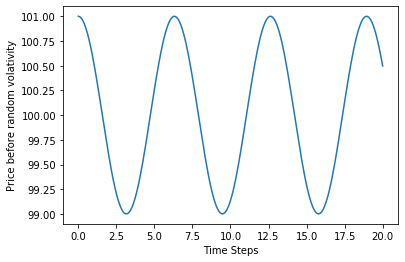

In [16]:
# initialize global variables
T = 20
dt = 0.1
N = round(T/dt)
t = np.linspace(0, T, N)
X0 = 50
cash0 = 1000
S0 = 100

# initialize securities number and price for each step
X = [X0] * N
cash = [cash0] * N
S_init = S0 + np.cos(np.arange(0, T, dt))

plt.plot(t, S_init)
plt.xlabel('Time Steps')
plt.ylabel('Price before random volativity')
plt.show()

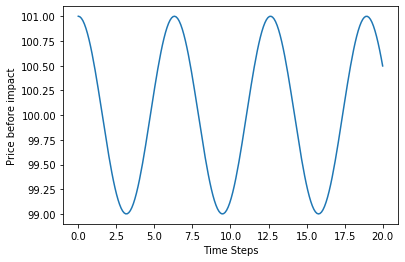

In [17]:
## independent random variable in volativity
xi = np.insert(np.random.normal(0, 1.0, N - 1), 0, 0.0)

## price dynamics
# volativity factors
def volativity_factor(volativity, xi):
    return volativity * xi

volativity = 0

S = [S_init[i] + volativity_factor(volativity, xi[i]) for i in range(N)]

plt.plot(t, S)
plt.xlabel('Time Steps')
plt.ylabel('Price before impact')
plt.show()

In [18]:
# impact
def permanent_impact(n, gamma):
    return gamma * n

def temporary_impact(n, epsilon, eta):
    return epsilon * np.sign(n) + eta * n

gamma = 0.01
epsilon = 0.1
eta = 0.1

In [19]:
class TestCase:
    def __init__(self):
        self.S = S.copy()
        self.n = np.zeros(np.shape(X))
        self.traders = []
    
    def add_trader(self, num, trader_type):
        for i in range(num):
            self.traders.append(trader_type(X, cash))
    
    def get_trader(self, index):
        return self.traders[index]
            
    def update_price(self):
        step = 0
        for i in range(N):
            step = step + 1
            for trader in self.traders:
                trader.trade(self.S, i)
                self.n[i] += trader.get_stock()[i - 1] - trader.get_stock()[i]
            self.S[i] = self.S[i] - permanent_impact(self.n[i], gamma)
            
    def get_price(self):
        return self.S
    
    def get_stock_difference(self):
        return self.n
    
    def plot_price(self):
        plt.plot(t, self.S)
        plt.xlabel('Time Steps')
        plt.ylabel('Price after impact')
        plt.show()

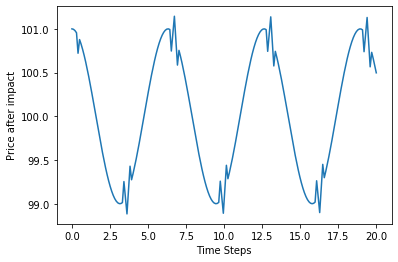

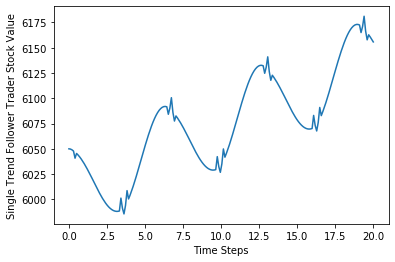

In [20]:
# robust test 1
test1 = TestCase()
test1.add_trader(1, TrendFollower)
test1.update_price()
test1.plot_price()

trader = test1.get_trader(0)
value = trader.get_value(test1.get_price())
plt.plot(t, value)
plt.xlabel('Time Steps')
plt.ylabel('Single Trend Follower Trader Stock Value')
plt.show()

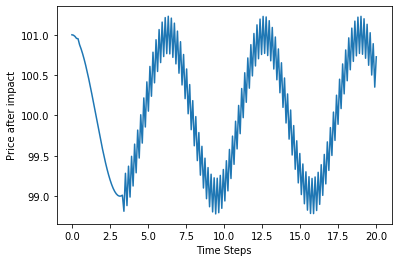

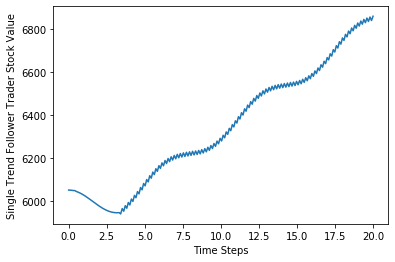

In [21]:
# robust test 2
test2 = TestCase()
test2.add_trader(1, MeanReversion)
test2.update_price()
test2.plot_price()

trader = test2.get_trader(0)
value = trader.get_value(test2.get_price())
plt.plot(t, value)
plt.xlabel('Time Steps')
plt.ylabel('Single Trend Follower Trader Stock Value')
plt.show()

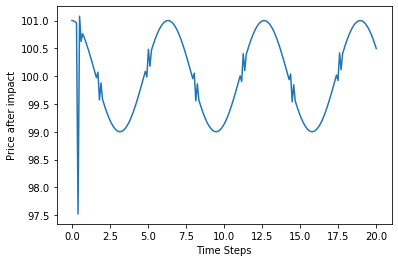

In [22]:
test3 = TestCase()
test3.add_trader(20, TrendFollower)
test3.add_trader(20, MeanReversion)
test3.update_price()
test3.plot_price()

In [23]:
n = test3.get_stock_difference()
n

array([  0.,   0.,   0.,   0., 340., -20.,  20.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., -20.,  20., -20.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,  20., -20.,  20.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., -20.,  20., -20.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  20., -20.,  20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       -20.,  20., -20.,   0.,   0.,   0.,   0.,   

In [33]:
trader1 = test3.get_trader(2)
action1 = trader1.actions
action1

array([  0.,   0.,   0.,   0., -20.,   1.,  22.,   0.,   0., -23.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   1.,  22., -22.,  22., -22.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  22.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., -22.,  22., -23.,  23.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -23.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   1.,  22., -22.,  22., -22.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  22.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., -22.,  22., -23.,  23.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., -23.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         1.,  22., -22.,  22., -22.,   0.,   0.,   

In [34]:
trader2 = test3.get_trader(20)
action2 = trader2.actions
action2

array([  0.,   0.,   0.,   0.,   3.,   0., -23.,   0.,   0.,  23.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., -23.,  23., -22.,  22.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., -22.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,  -1.,  23., -23.,  23., -23.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  23.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., -23.,  23., -22.,  22.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -22.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  -1.,  23., -23.,  23., -23.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,  23.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., -23.,  23., -22.,  22.,   0.,   0.,   